In [2]:
# CIFAR 10 DATASETS LABEL AND INXED 

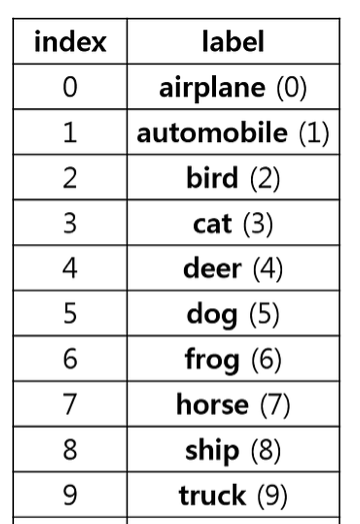

#### STEP 1: IMPORT NECESSARY LIBRARIES AND DATASETS

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
#  importing datasets
from keras.datasets import cifar10

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

#### STEP 2: VISUALIZATION DATASETS

[8]


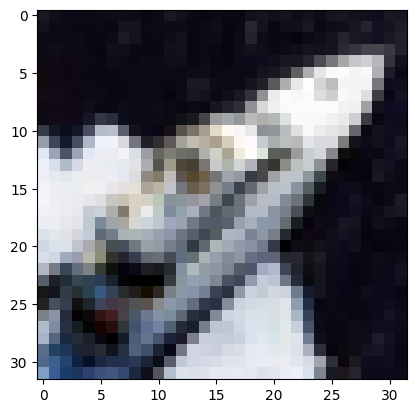

In [12]:
i = 20000
plt.imshow(X_train[i])
print(y_train[i])

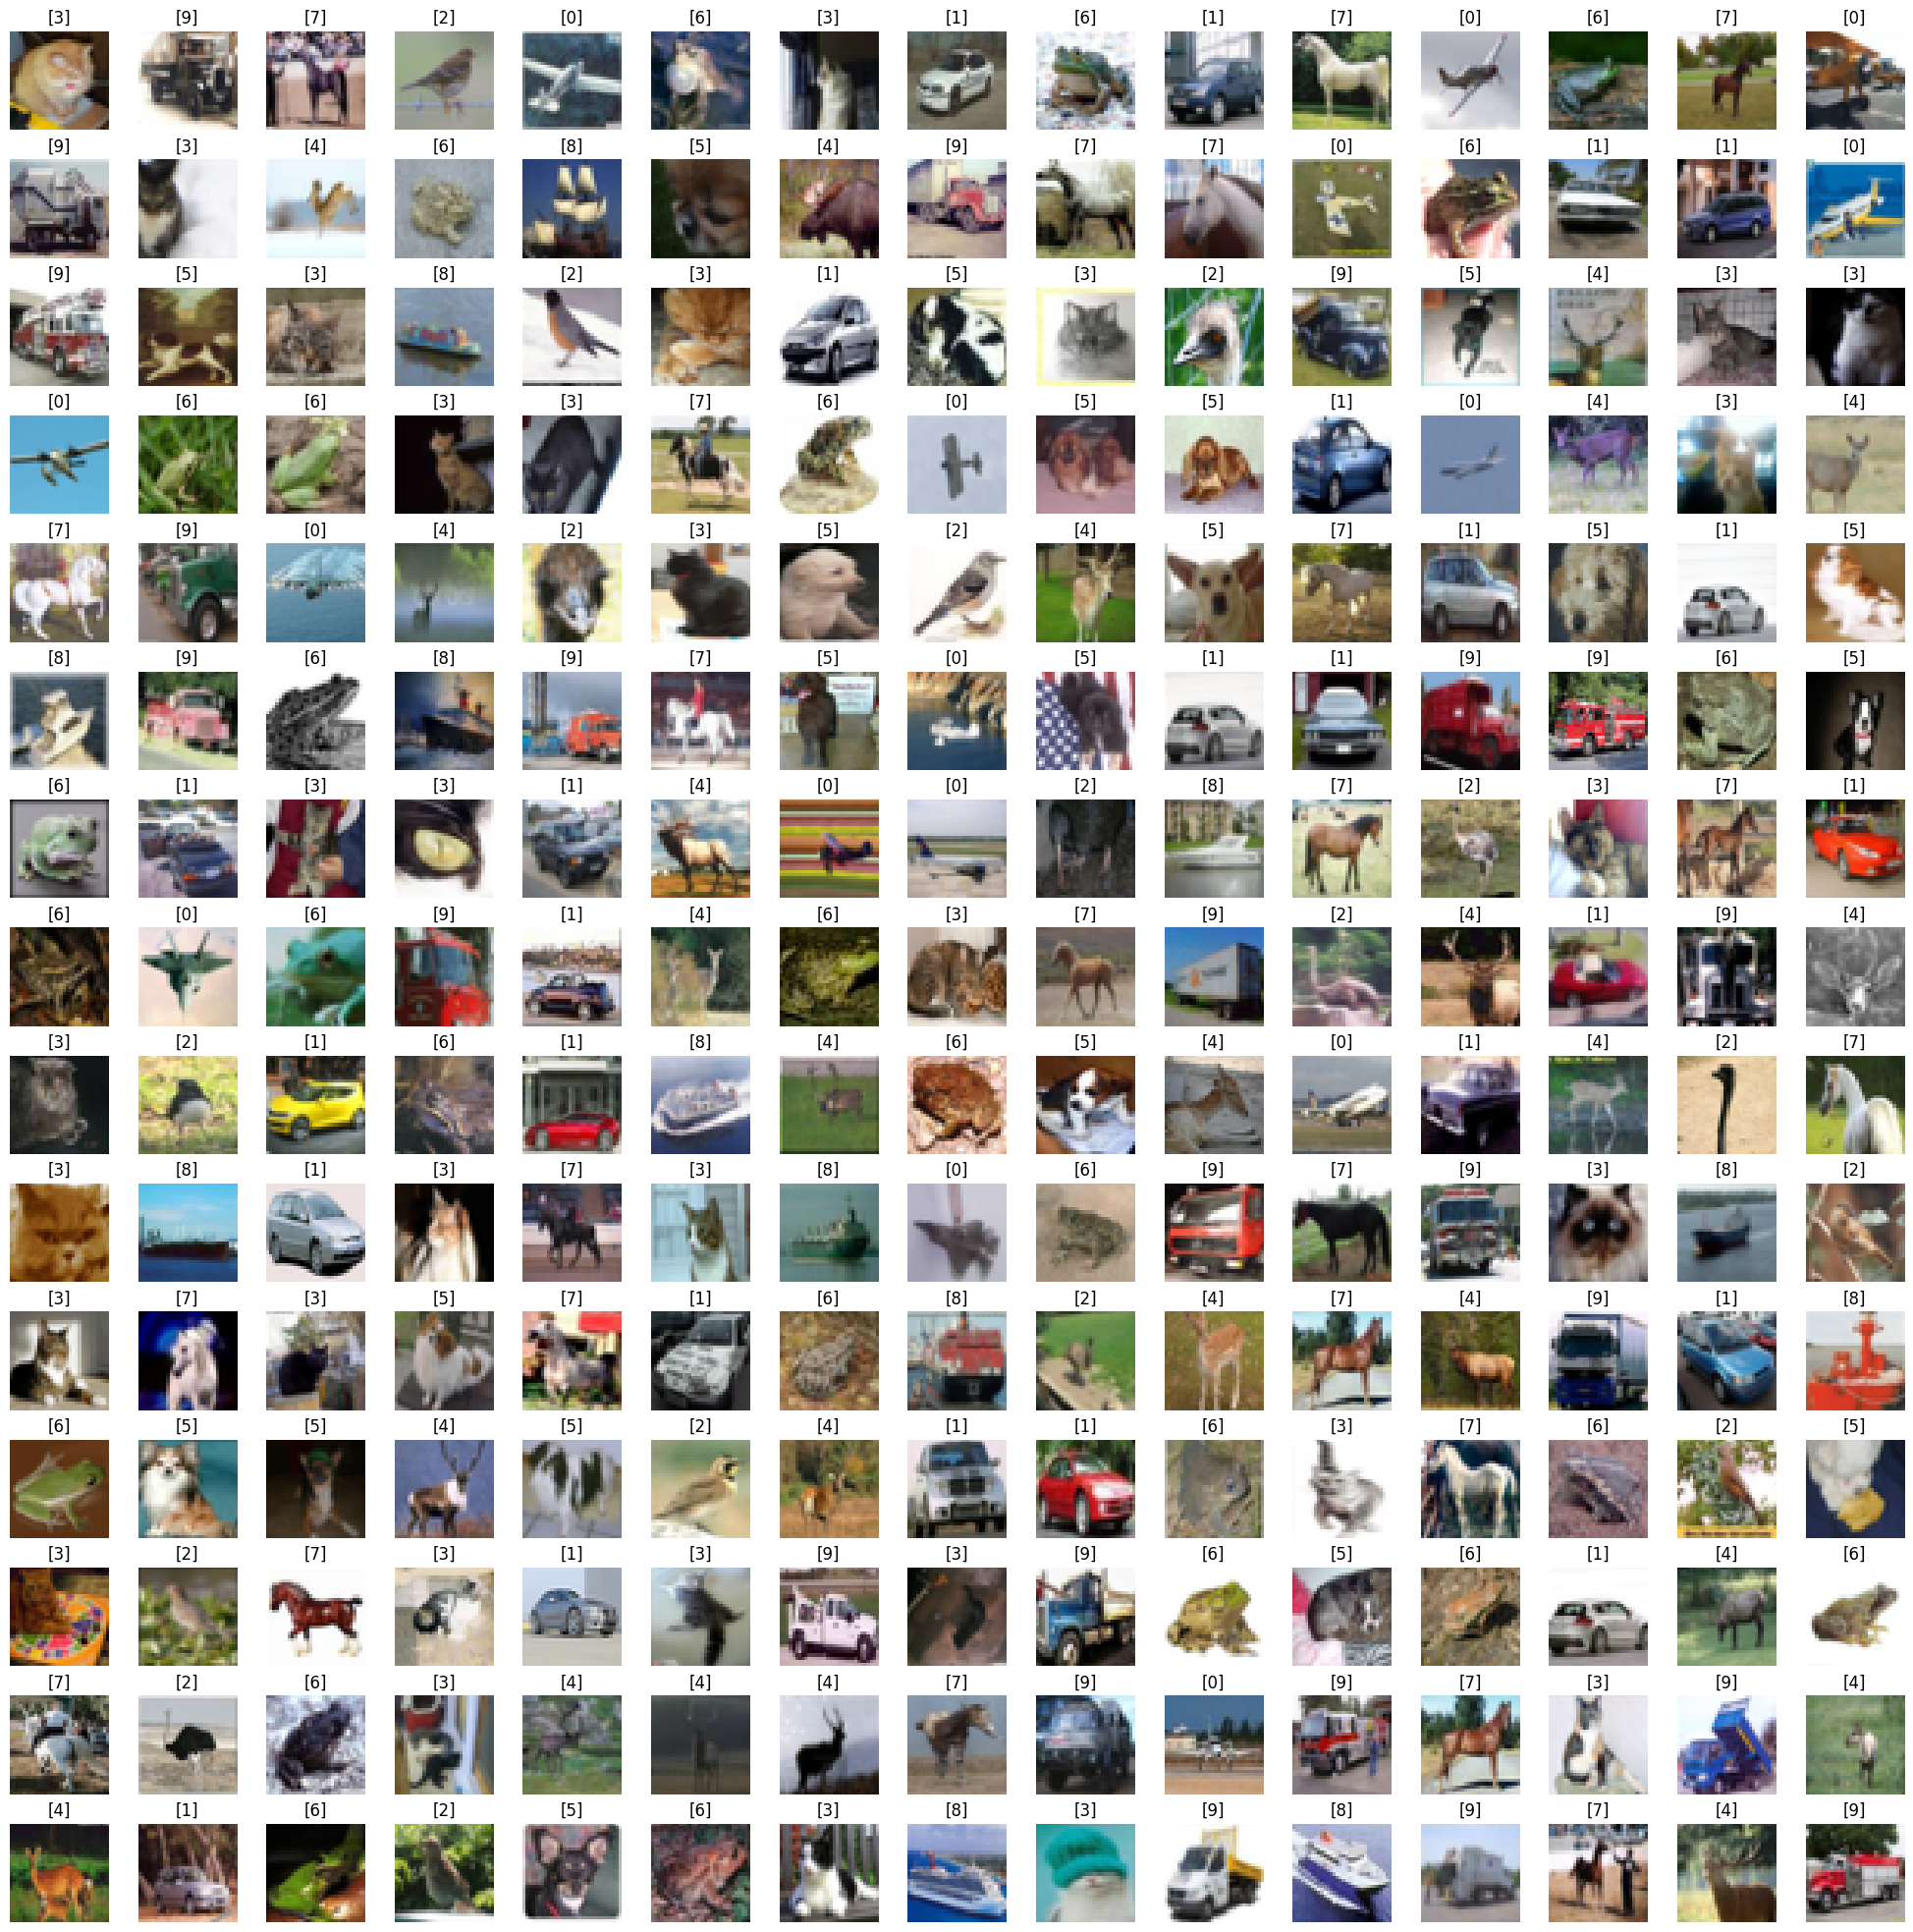

In [13]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel() # flattening image 


n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # picking random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.3)


In [14]:
n_training

50000

#### STEP 3: DATA PREPERATION

In [18]:
# converting X_train, X_test into float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
number_catogries = 10 

In [20]:
# conerting y_train and y_test into categorial/binary form 
import keras

y_train = keras.utils.to_categorical(y_train, number_catogries)
y_test = keras.utils.to_categorical(y_test, number_catogries)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [22]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [23]:
# Normalize X_train, X_test
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [25]:
X_train.dtype

dtype('float32')

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
# we only need (32,32,3)
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

#### STEP 4: TRAINING MODEL 

In [30]:
import tensorflow

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [33]:
cnn_model = Sequential()

In [37]:
# creating convolutional layer 
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=Input_shape ))

# Second concolutional layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))

# Creating Maxpooling
cnn_model.add(MaxPooling2D(2,2))

# Droping out units:neurons
cnn_model.add(Dropout(0.2))

# Again repeating process
# creating convolutional layer 
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))

# Second concolutional layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))

# Creating Maxpooling
cnn_model.add(MaxPooling2D(2,2))

# Droping out units:neurons
cnn_model.add(Dropout(0.2))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Flattening convolutional layer 
cnn_model.add(Flatten())

In [41]:
# Creating neural network 
# 1st layer
cnn_model.add(Dense(units=512, activation='relu'))

# 2nd hidden layer
cnn_model.add(Dense(units=512, activation='relu'))

# ouput layer
cnn_model.add(Dense(units=10, activation='softmax'))


In [42]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
y_train.shape

(50000, 10)

In [ ]:
# compiling model
cnn_model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.RMSprop(learning_rate= 0.001), metrics=['accuracy'] )

# fit trainig data to model
history= cnn_model.fit(X_train, y_train, batch_size=50, epochs=30, shuffle= True)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.3079 - loss: 1.8833
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.5686 - loss: 1.2219
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.6638 - loss: 0.9552
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.7214 - loss: 0.8038
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.7586 - loss: 0.7022
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.7797 - loss: 0.6394
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8023 - loss: 0.5872
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8089 - loss: 0.5581
Epoch 9/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8209 - loss: 0.5325
Epoch 10/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8299 - loss: 0.5175
Epoch 11/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8396 - loss: 0.4883
Epoch 12

#### STEP 5: EVALUATE THE MODEL

In [44]:
X_test.shape

(10000, 32, 32, 3)

In [46]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7135 - loss: 0.8460


In [48]:
print("Test Accuracy:{}".format(evaluation[1]))

Test Accuracy:0.7060999870300293


In [50]:
# Get predicted probabilities
predicted_probabilities = cnn_model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [52]:
predicted_classes

array([8, 8, 8, ..., 5, 1, 7])

In [54]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [56]:
# converting into argmax 
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [58]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

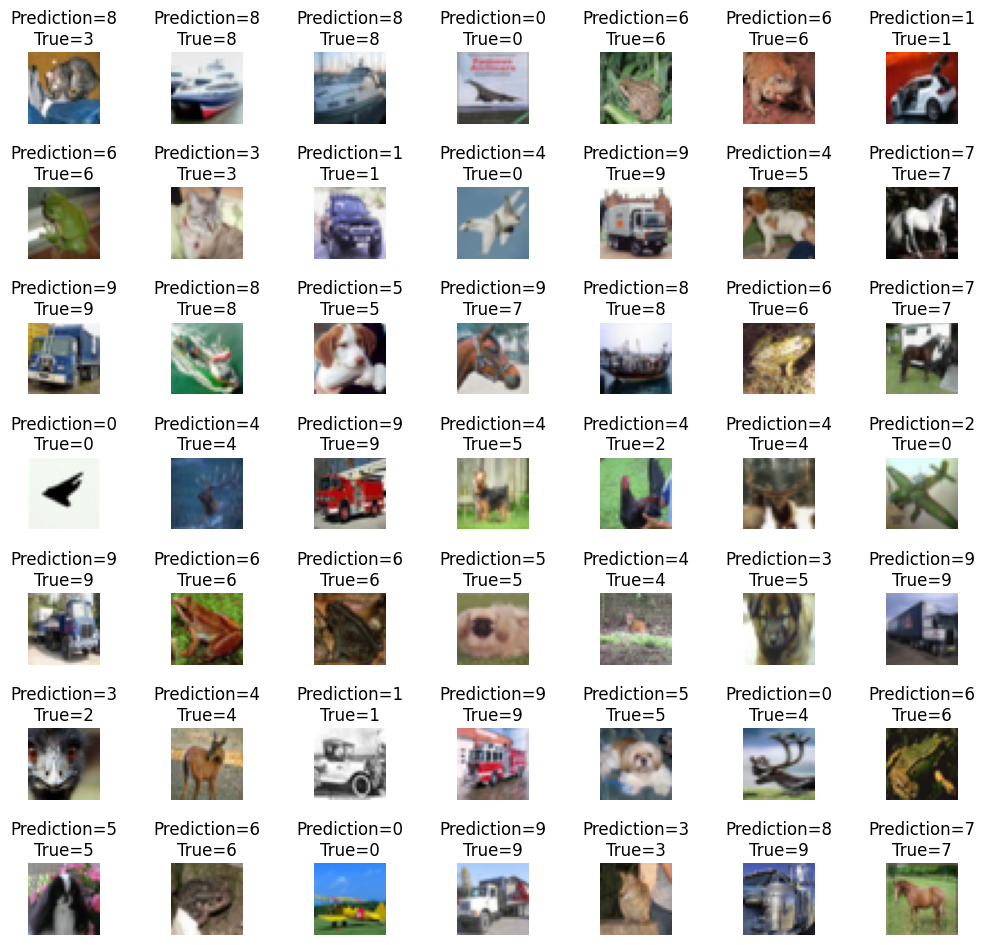

In [62]:
L= 7
W= 7

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction={predicted_classes[i]}\nTrue={y_test[i]}')
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[689,   9, 117,   8,  18,   5,  14,   7, 116,  17],
       [ 19, 846,   7,   3,   2,   3,  21,   2,  48,  49],
       [ 50,   5, 638,  43, 104,  39,  86,  14,  18,   3],
       [ 15,   7, 109, 523,  66, 111, 117,  18,  24,  10],
       [ 14,   1,  94,  38, 687,  20,  97,  34,  13,   2],
       [ 11,   5, 103, 200,  62, 519,  53,  33,  10,   4],
       [  4,   0,  61,  46,  23,   4, 855,   3,   4,   0],
       [ 16,   3,  70,  38,  95,  60,  12, 689,   6,  11],
       [ 54,  18,  16,  14,   7,   3,   6,   2, 868,  12],
       [ 38,  90,  10,  16,  10,   8,  20,  14,  47, 747]])

<Axes: >

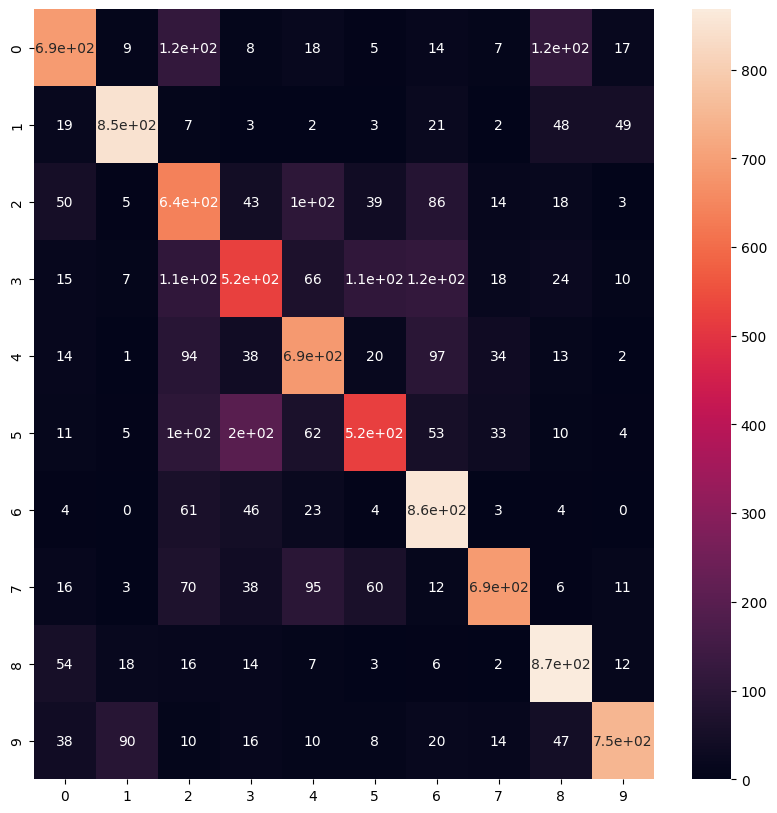

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

#### STEP 6: SAVING MODEL

In [83]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras-cifar10-model.h5')
cnn_model.save(model_path)